Experimento  de Transferência de Aprendizado
----------------------------------------

Neste experimento o robô possui 5 ações: 

    walk foward; 
    walk backward; 
    do nothing; 
    turn right; 
    turn left; 

O objetivo do robô é quando a bola aparece próximo dele, ele deve ir até a bola e chutá-la para frente.

----

Foi incluido o tensorboard no arquivo duel_dqn_transf.py

```
callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=500000)]
callbacks += [FileLogger(log_filename, interval=100)]
callbacks += [keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]
dqn.fit(env, callbacks=callbacks, nb_steps=3200000, log_interval=10000)
```

No entanto, foi necessário alterar a linha 862 do arquivo */usr/local/lib/python2.7/dist-packages/keras/callbacks.py* de *summary_value.simple_value = value.item()* para *summary_value.simple_value = value*

If you want to visualize the files created during training, run in your terminal

```tensorboard --logdir path_to_current_dir/Graph ```


----
> 1 - 06-april - Foi realizado um teste com a transferencia de aprendizado no robo real. <span style="color:red">Resultado: Foi realizado teste no robô real, no entanto não houve sucesso na transferencia do aprendizado utilizando a rede treinada no simulador.</span>

----
> 2 - 06-april - Realizar treinamento com a bola laranja ao inves da bola branca (esta sendo retirado todas as carecteristica de formato, mantendo apenas cores), aplicar a cor e as dimensões da bola parecida com as dimensoes da bola real, aplicar a cor do campo parecido com as do tecido q esta sendo utilizado no robo real. <span style="color:red">Resultado: O robo não aprendeu apenas com a bola laranja, talvez poque variar a cor da bola faz com que em escala de cinza perca a informação da cor</span>


----
> 3 - 12-april - Realizando treinamento com a bola branca, variando a cor da bola branca e dimensão da bola, foi aplicado a cor do campo parecido com as do tecido q esta sendo utilizado no robo real e tambem a cor do chao do laboratorio, também foi aplicado a mesma relação do quadro da camera para manter a mesma distorção. <span style="color:red">Resultado: O robo aprendeu, <span style="color:blue"> foi aplicado no robo real e funcionou a transferência<span style="color:red">, o robo seguia a bola, foi tentado mudar a relação do frame da camera no robo real, porém quando mudava a relação, não funcionava a transferencia.</span>


----

> <span style="color:blue">Sugestões:</span>

>Variar a velocidade do passo (variar a dinamica do sistema).

>Colocar um objetivo do robo parar quando nao ve a bola.

>Fazer um blur na imagem.

In [1]:
%pylab inline
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

Populating the interactive namespace from numpy and matplotlib


In [2]:
path, dirs, files = os.walk("./rewardFiles").__next__()
num_amostras = len(files)
amostra = np.loadtxt('./reward_file.dat') #5 action - penaulty
amostras = [np.loadtxt('./rewardFiles/'+x) for x in files]

labels = []
for x in files:
    with open('./rewardFiles/'+x) as fh:
        line = fh.readline()
        labels.append(line[1:-1])

with open('reward_file.dat') as fh:
    line = fh.readline()
labelsP = line[1:-1]
# print labels

In [3]:
d = {'episodes' : pd.Series(amostra[:,1], index=amostra[:,0], dtype=int16), 
     'episode_rewards' : pd.Series(amostra[:,2], index=amostra[:,0]),
     'return_goal' : pd.Series(amostra[:,6], index=amostra[:,0], dtype=int16),
     'reach_ball' : pd.Series(amostra[:,7], index=amostra[:,0], dtype=int16),
     'fails' : pd.Series(amostra[:,8], index=amostra[:,0], dtype=int16)}

dt = []

for ind in range(num_amostras):
    dt.append(  {'episodes' : pd.Series(amostras[ind][:,1], index=amostras[ind][:,0]), 
                 'episode_rewards' : pd.Series(amostras[ind][:,2], index=amostras[ind][:,0]),
                 'return_goal' : pd.Series(amostras[ind][:,6], index=amostras[ind][:,0], dtype=int16),
                 'reach_ball' : pd.Series(amostras[ind][:,7], index=amostras[ind][:,0], dtype=int16),
                 'fails' : pd.Series(amostras[ind][:,8], index=amostras[ind][:,0], dtype=int16)})

In [4]:
df = pd.DataFrame(d)
df.index = df.index*10000
dfs = [pd.DataFrame(dt[i]) for i in range(num_amostras)]
for dfs_i in dfs:
    dfs_i.index = dfs_i.index*10000
df.head()

,episodes,episode_rewards,return_goal,reach_ball,fails
10000.0,57,-118.573684,29,13,45
20000.0,55,-124.889091,8,8,47
30000.0,55,-125.403636,9,9,46
40000.0,61,-112.452459,16,16,45
50000.0,59,-116.650847,13,13,46


No handles with labels found to put in legend.


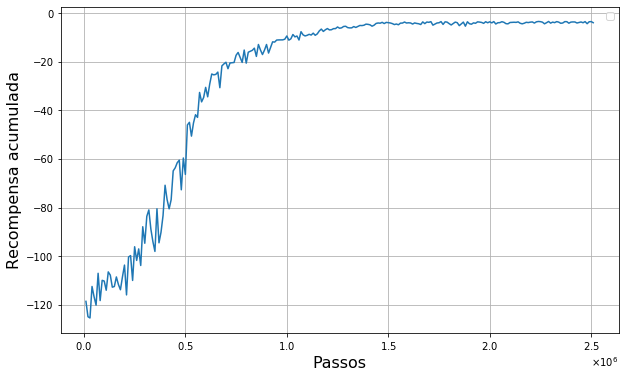

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df.episode_rewards)
plt.legend()
plt.xlabel(u'Passos', fontsize=16)
plt.ylabel(u'Recompensa acumulada', fontsize=16)
plt.grid()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.savefig("./fig_graph/reward.png")

Text(0, 0.5, 'Accumulated reward')

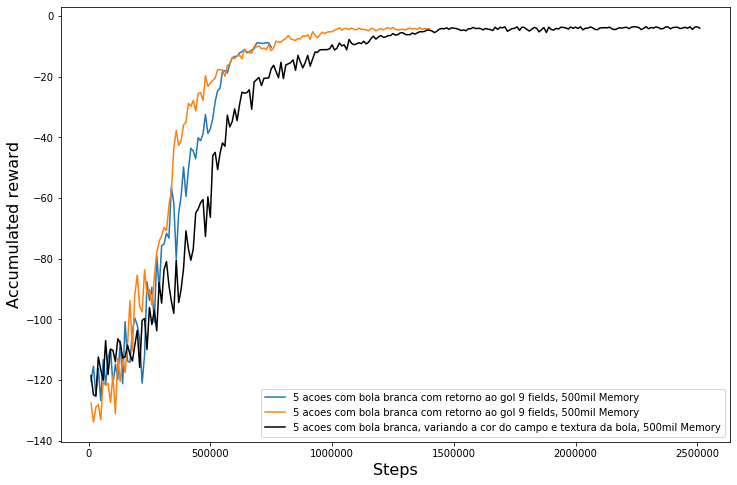

In [6]:
plt.figure(figsize=(12,8))
for ind in range(num_amostras):
    plt.plot( dfs[ind].episode_rewards, label=labels[ind])

plt.plot(df.episode_rewards, 'k', label=labelsP)
plt.legend()
plt.xlabel(u'Steps', fontsize=16)
plt.ylabel(u'Accumulated reward', fontsize=16)
# plt.yscale('log')

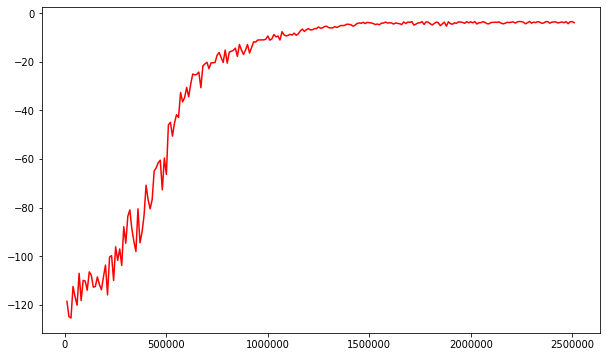

In [7]:
plt.figure(figsize=(10,6))
plt.plot(df.episode_rewards[df.index>130], 'r')
# plt.yscale('log')

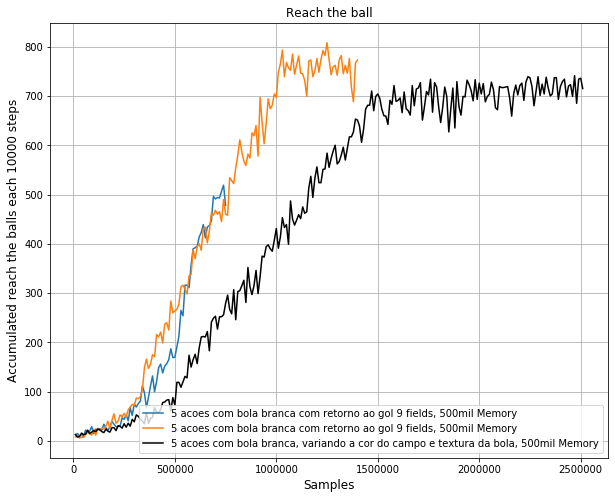

In [8]:
plt.figure(figsize=(10,8))
# plt.plot(df6.episode_rewards[df6.index>150], 'y')
# plt.plot(df3.episode_rewards[df3.index>150])
for ind in range(num_amostras):
    plt.plot( dfs[ind].reach_ball, label=labels[ind])

plt.plot( df.reach_ball, 'k',label=labelsP)
plt.xlabel(u'Samples', fontsize=12)
plt.ylabel(u'Accumulated reach the balls each 10000 steps', fontsize=12)
plt.title('Reach the ball')
plt.legend()
plt.grid()
plt.savefig("./fig_graph/reach.png")

O gráfico abaixo apresenta a quantidade de falhas que ocorreu para cada 10.000 passos, sendo possivel haver no máximo 50 falhas porque número máximo de passos por episódio é 200 passos.
Neste experimento a falha significa que o agente não realizou o objetivo, chutar a bola no gol, e nem sequer chegou até a bola.

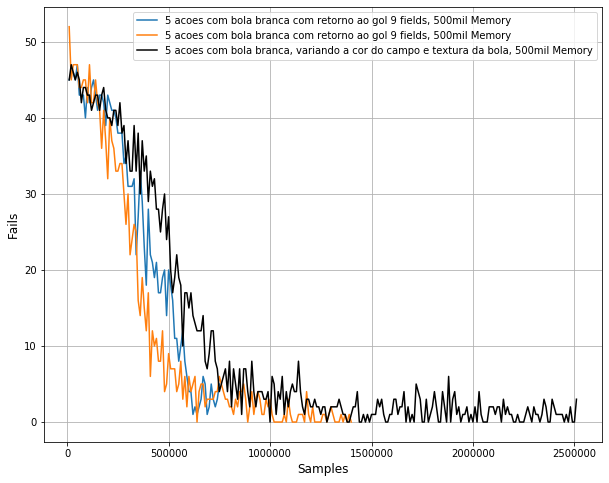

In [9]:
plt.figure(figsize=(10,8))
# plt.plot( dfs[5].fails,label=u'5 acoes, bola branca, 9 fields, input 84x84')
# plt.plot( dfs[6].fails,label=u'5 acoes, bola branca, 9 fields, input 84x84')
# plt.plot( dfs[7].fails,label=u'5 acoes, bola branca, 9 fields, input 84x84')
for ind in range(num_amostras):
    plt.plot( dfs[ind].fails, label=labels[ind])
    
plt.plot( df.fails, 'k',label=labelsP)
# plt.title('Episode fails')
plt.xlabel(u'Samples', fontsize=12)
plt.ylabel(u'Fails', fontsize=12)
plt.legend()
plt.grid()
plt.savefig("./fig_graph/fails.png")

Gráfico abaixo apresenta a média de passos por episódio para chegar até a bola para cada 10.000 passos, sendo que 200 é o número máximo de passos por episódio.

13.49527665317139


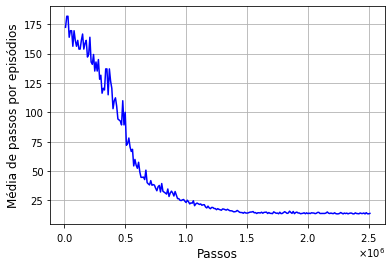

In [10]:


avg_steps_per_episode_reach_ball = (10000 - df.fails*400)/df.reach_ball
avg_steps_per_episode_per_ten1    = 10000/(df.fails+df.reach_ball)
# avg_steps_per_episode_per_ten2    = 10000/(dfs[5].fails+dfs[5].reach_ball)
# plt.plot( avg_steps_per_episode_per_ten2[:120],label=u'5 acoes, bola branca, 9 fields, input 84x84')
plt.plot( avg_steps_per_episode_per_ten1, 'b',label=u'7 acoes, bola branca, 9 fields, input 84x84')
# plt.title('Average steps  per episodes to reach the ball') #Media de passos por episodios para cada 10.000 passos
plt.xlabel(u'Passos', fontsize=12)
plt.ylabel(u'Média de passos por episódios', fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.grid()
#plt.legend()
print( min(avg_steps_per_episode_per_ten1) )

plt.savefig("./fig_graph/steps.png")

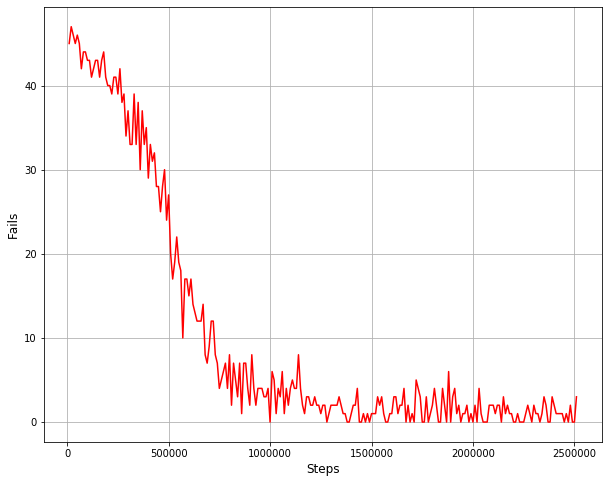

In [11]:
plt.figure(figsize=(10,8))
# plt.plot( dfs[5].fails,label=u'5 acoes, bola branca, 9 fields, input 84x84')
# plt.plot( dfs[6].fails,label=u'5 acoes, bola branca, 9 fields, input 84x84')
# plt.plot( dfs[7].fails,label=u'5 acoes, bola branca, 9 fields, input 84x84')
# for ind in range(num_amostras):
#     plt.plot( dfs[ind].fails, label=labels[ind])
    
plt.plot( df.fails, 'r',label=labelsP)
# plt.title('Episode fails')
plt.xlabel(u'Steps', fontsize=12)
plt.ylabel(u'Fails', fontsize=12)
# plt.legend()
plt.grid()
plt.savefig("./fig_graph/fails.png")

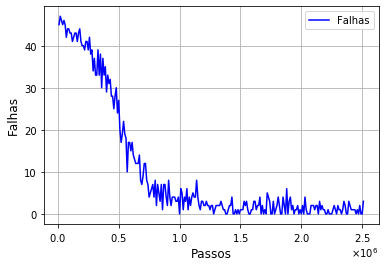

In [12]:
plt.plot( df.fails, 'b',label=u'Falhas')
#plt.title('Episode fails')
plt.xlabel(u'Passos', fontsize=12)
plt.ylabel(u'Falhas', fontsize=12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.grid()
plt.legend()
plt.savefig("./fig_graph/fails.png")

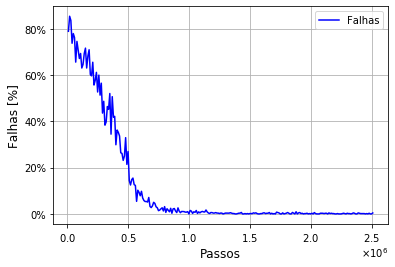

In [13]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1, 1, 1)
plt.plot( df.fails*100/df.episodes, 'b',label=u'Falhas')
# plt.title('Episode fails [%]')
plt.xlabel(u'Passos', fontsize=12)
plt.ylabel(u'Falhas [%]', fontsize=12)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.grid()
plt.legend()
plt.savefig("./fig_graph/percentFails.png")